<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_one_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Load Dataset (Question 1)

In [65]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables (Question 1)

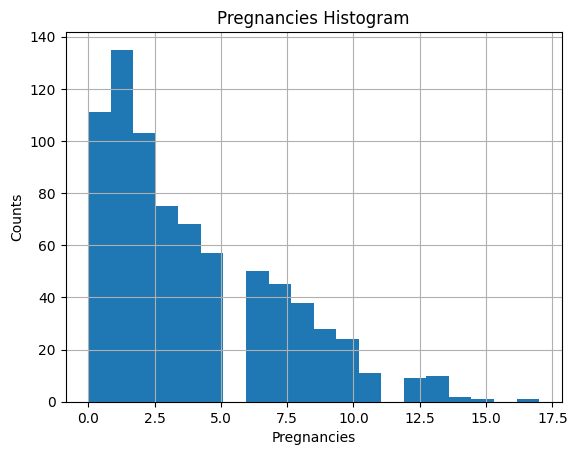

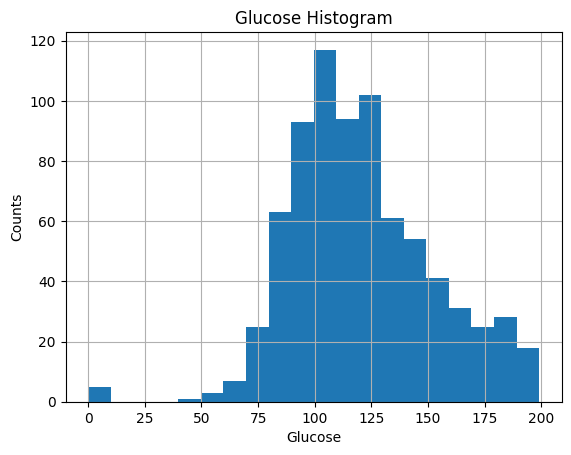

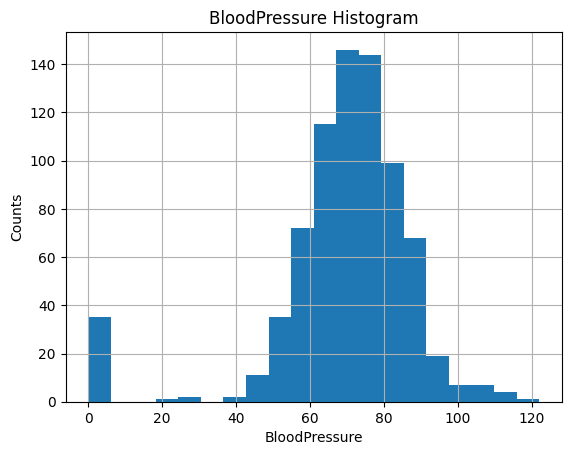

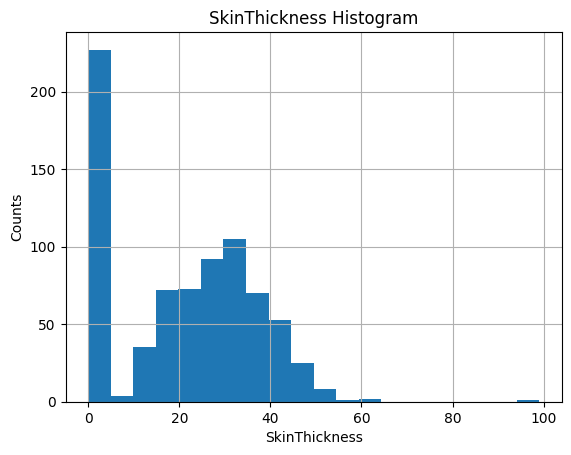

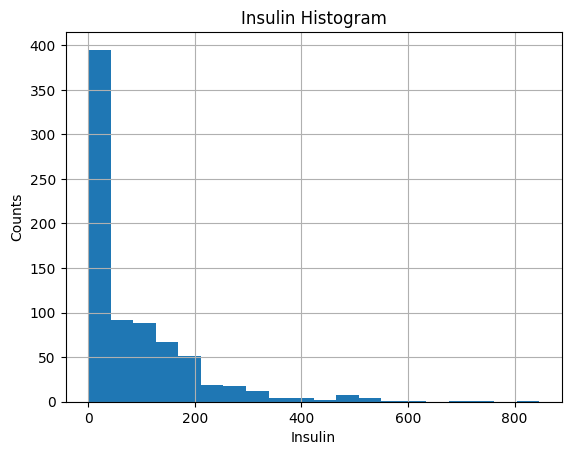

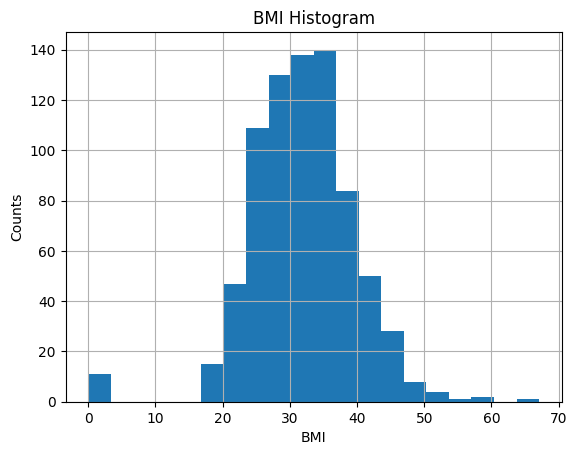

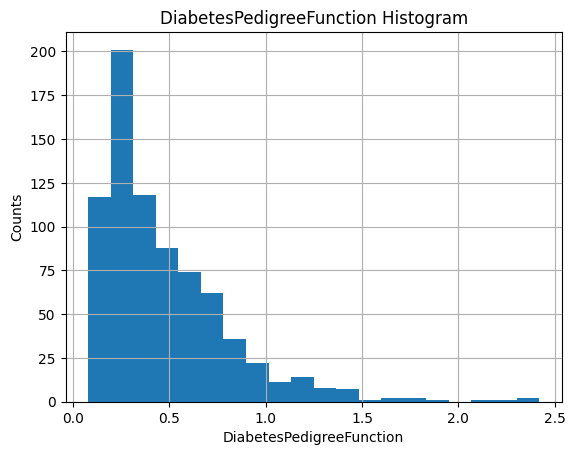

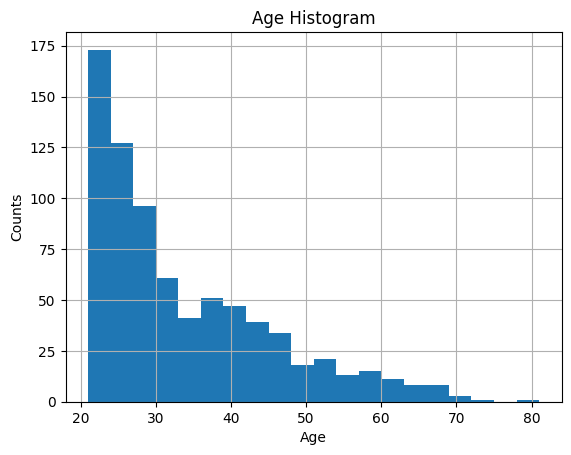

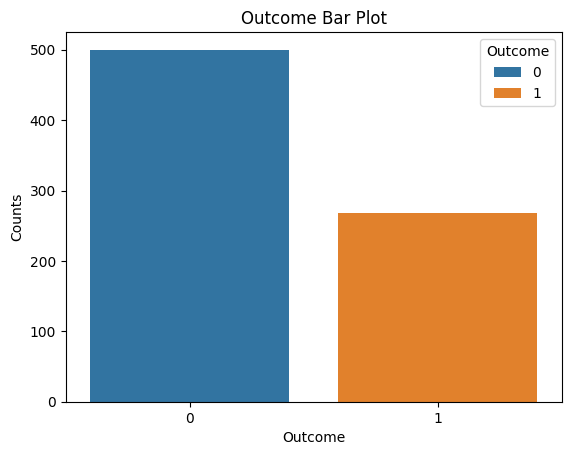

In [66]:
# Get all characteristics from dataset in a list and iterate this list
for characteristic in df.columns.tolist()[:-1]:  # [:-1] -> will exclude Outcome value

  # Create histogram for each characteristic
  df[characteristic].hist(bins=20)
  plt.title(f'{characteristic} Histogram')
  plt.xlabel(characteristic)
  plt.ylabel('Counts')
  plt.show()
  print("\n")

# Outcome - Bar Plot
sns.countplot(x='Outcome', data=df, hue='Outcome')
# df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Outcome Bar Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

# Quality of Data (Question 2)

Στα δεδομένα που δώθηκαν παρατηρούνται μηδενικές τιμές για τα χαρακτηριστικά Glucose Blood Presure, Skin Thickness, Insulin και BMI. Κάτι τέτοιο δεν είναι εφικτό από ιατρικής άποψης. Η χρήση αυτών των τιμών μπορεί να οδηγήσει σε λανθασμένα αποτελέσματα. Μια προεργασία των τιμών αυτών πιθανώς θα βελτίωνε την εκπαίδευση και την πρόβλεψη των μοντέλων.

Πολλά από τα χαρακτηριστικά δεν εμφανίζουν ισορροπημένη κατανομή (με βάση τα γραφήματα). Γεγονός σαν αυτό θα επηρεάσει την απόδοση του classifier και κατ' επέκταση την απόδοση του model στις προβλέψεις. Παράδειγμα της παραπάνω αιτιολογίας αποτελεί το χαρακτηριστικό Age, όπου υπάρχει πληθώρα τιμών για τις νέες ηλικίες. Έτσι το μοντέλο θα είναι σε θέση να προβλέψει πιθανώς καλύτερα για τους νέους αλλά με μεγάλη ανασφάλεια για τις μεγαλύτερες ηλικίες.


Επομένως, η ποιότητα των δεδομένων δεν είναι ικανοποιητική. Δεν υπάρχει ισορροπημένη κατανομή στις τιμές των χαρακτηριστικών, και ταυτόχρονα υπάρχουν μη ρεαλιστικές τιμές στα χαρακτηριστικά αυτά. Κάτι τέτοιο θα έδινε λάθος εκπαίδευση στο model με αποτέλεσμα να έχουμε λάθος προβλέψεις. Το πρόβλημα αυτό πιθανώς να λυνόταν με μια προεπεξεργασία των δεδομένων και αύξηση αυτών.


# Age Analysis (Question 3)

Η κατανομή του ιστογράμματος Age δεν είναι κανονική. Ακολουθεί μια λοξή κατανομή με δεξιά κλίση.
Παρατηρούμε ότι υπάρχει άνιση κατανομή στο πλήθος των δειγμάτων, καθώς η πλειοψηφία των τιμών συγκεντρώνεται στις μικρές ηλικίες. Το δείγμα δηλαδή έχει κυρίως νέες ηλικίες.
Η συγκεκριμένη κατανομή δεν είναι τόσο καλή καθώς δεν υπάρχουν δείγματα από όλες τις κατηγορίες ηλικιών, κάτι το οποίο μπορεί να οδηγήσει σε μεροληψία και ανακρίβεια προβλέψεων σε υψηλότερες ηλικίες.

# Glucose - Diabetes Correlation / Question (4)

In order to find the correlation between glucose and diabetes I decided to create a diagram between these two characteristics.

For this reason, after some search, I decided to create a scatter plot. In x axis I put the glucose characteristic and in y axis the Outcome (0 no diabates, 1 yes diabetes).

I checked the result and I shaw that when the number of glucose is very big, the value is y axis in 1 (Yes diabetes).
So is more likely when glucose is big, the person to appear diabete.

You can check the scatter plot below:

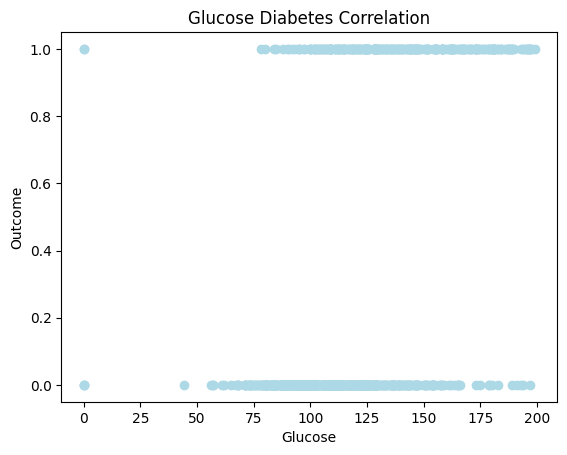

In [67]:
plt.scatter( df['Glucose'],df['Outcome'],color='lightblue')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Glucose Diabetes Correlation')
plt.show()

# Convert DataFrame to Numpy arrays - Split data (Question 5)


In [68]:
# Prepare datasets for creating numpy arrays
input_df = df.drop(columns=['Outcome']) # (X) Inputs without Outcome
targets_df = df['Outcome'] # (Y) Targets with Outcome

# Create numpy arrays (x, y)
x = input_df.to_numpy()
y = targets_df.to_numpy()

# Split data to train and test for x and y respectively
seed=0
test_size=0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# Print results
print(f"X train: {x_train.shape}\n")
print(f"X test: {x_test.shape}\n")
print(f"Y train: {y_train.shape}\n")
print(f"Y test: {y_test.shape}\n")


X train: (537, 8)

X test: (231, 8)

Y train: (537,)

Y test: (231,)



# Logistic Regression Classifier (Question 6)

In [69]:
# Create Logistic Regression model/object
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set
model.fit(x_train, y_train)

# Evaluate model in test set
y_pred = model.predict(x_test)
# print(f"Model test set evaluation: \n\n{y_pred}\n")

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}\n')


The accuracy of the model is: 77.92



Η ακρίβεια του model βρίσκεται στο 77.92%. Ένα υψηλό ποσοστό, πολύ κοντά στο 100%. Αυτυό σημαίνει ότι ο διαχωρισμός των data σε training & testing sets στέφθει με επιτυχία. Επίσης η ο διαχωρισμός των data και η χρήση αυτών με την μεθοδολογία Logistic Regression φαίνεται να απέδωσαν ένα ικανοποιητικό αποτέλεσμα.

### Check Classifier according to Ages (Question 7)

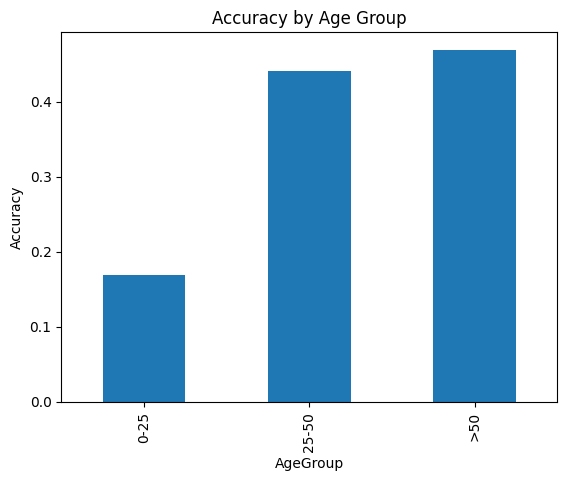

In [70]:
# Create age groups
age_groups = pd.cut(df['Age'], bins=[0, 25, 50, 100], labels=['0-25', '25-50', '>50'])

# Insert age group in the data
df['AgeGroup'] = age_groups

# Calculate accuracy for each age group
accuracy_per_age = df.groupby('AgeGroup', observed=True)['Outcome'].mean()

# Create bar graph
accuracy_per_age.plot(kind='bar')
plt.title('Accuracy by Age Group')
plt.ylabel('Accuracy')
plt.show()

Η απόδοση και στις 3 ηλικιακές κατηγορίες, και ιδιαίτερα στις νεανικές ηλικίες, ειναι πολύ μικρή. Επομένως, δεν θα ήταν εφικτό να εμπιστευτούμε το μοντέλο. Πιθανώς να χρειάζεται επιπλέον εκπαίδευση με περισσότερα δεδομένα και με δεδομένα υψηλότερης ποιότητας.

# Stochastic explanation related to Classifier (Question 8)

Θα ήταν πιο σημαντικό και πιο ασφαλές ο παραπάνω Classifier να προβλέπει ότι κάποιος έχει διαβήτη και εν τέλει να μην έχει. Στην αντίθετη περίπτωση, δηλαδή, να προβλέπει ότι δεν έχει διαβήτη ενώ έχει καθιστά την πρόβλεψη προβληματική, αναξιόπιστη και επικίνδυνη.

# Rerun processes 5-6 with different seeds (Question 9)

In [71]:
accuracies = []

for current_seed in range(10):

  # Prepare datasets for creating numpy arrays
  input_df = df.drop(columns=['Outcome', 'AgeGroup']) # (X) Inputs without Outcome and AgeGroup that was added in previous question
  targets_df = df['Outcome'] # (Y) Targets with Outcome

  # Create numpy arrays (x, y)
  x = input_df.to_numpy()
  y = targets_df.to_numpy()

  # Split data to train and test for x and y respectively
  test_size=0.3
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=current_seed)

  # Create LogisticRegression model/object
  model = LogisticRegression(max_iter=1000, random_state=current_seed)

  # Train model on training set
  model.fit(x_train, y_train)

  # Evaluate model in test set
  y_pred = model.predict(x_test)

  # Measure the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)

  # Add accuracy to the respective list
  accuracies.append(accuracy_percentage)

print(f'Accuracies: {accuracies}\n')

# Claculate mean of all accuracies
mean_accuracy = np.mean(accuracies)

# Calculate standard deviation of all accuracies
std_accuracy = np.std(accuracies)

# Print results
print(f"Accuracies mean: {round(mean_accuracy, 2)}")
print(f"Accuracies standard deviation: {round(std_accuracy, 2)}")

Accuracies: [77.92, 78.35, 74.89, 75.32, 80.95, 78.35, 76.62, 77.92, 77.92, 74.46]

Accuracies mean: 77.27
Accuracies standard deviation: 1.87


# Min-Max Normalization  (Question 10)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

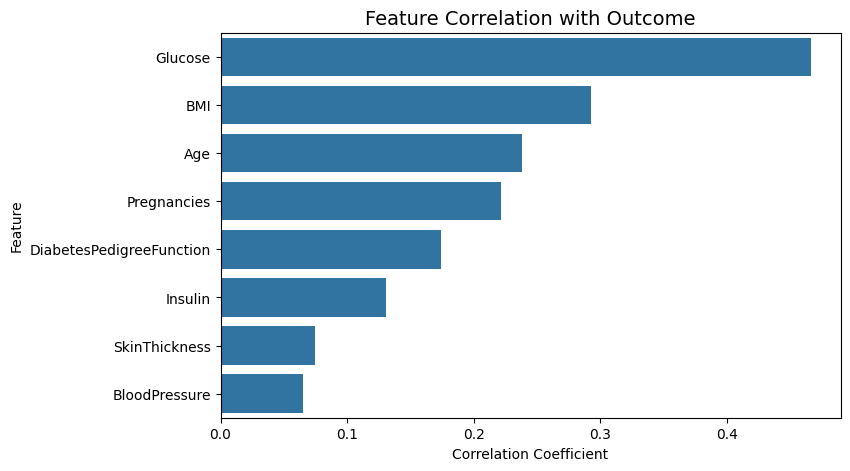

In [72]:
# Make calculation (Normalization min-max)
normalization_min_max = (input_df - input_df.min(axis=0)) / (input_df.max(axis=0) - input_df.min(axis=0))

# Concat normaliazation data with Outcome
df_normalized = pd.concat([normalization_min_max, df['Outcome']], axis=1)

print(df_normalized)
print("\n")

# Exclude outcome (target)
needed_data = df_normalized.drop(columns=['Outcome'])

# Get data as a correlations array
corr_matrix = df_normalized.corr()

# Create a correlation with target
correlation_with_target = needed_data.corrwith(df['Outcome']).sort_values(ascending=False)

# Print correlations
print(f"Correlations: \n\n{correlation_with_target}\n")

# Create plot bar chart in order to appear correlations and come to a conclusion
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title("Feature Correlation with Outcome", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

Με βάση τα παραπάνω αποτελέσματα, φαίνεται ότι οι τρεις πιο σημαντικοί παράγοντες που επηρεάζουν την πρόβλεψη διαβήτη είναι οι Glucose, BMI και Age.

Μάλιστα, φαίνεται ότι η Glucose εμφανίζει τον υψηλότερο συντελεστή συσχέτισης με το αποτέλεσμα. Από αυτό μπορούμε να συμπεράνουμε ότι η συγκέντρωση γλυκόζης στο αίμα είναι ο πιο καθοριστικός παράγοντας για την πρόβλεψη του διαβήτη.

# Second Part of the Exercise

# Question (1)

In [73]:
# Read csv
new_def = pd.read_csv('diabetes.csv')

# Add in data set the desired characteristics
input_df = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]

# Convert desired data into numpy arrays (x, y)
x = input_df.to_numpy()
y = df['Glucose'].to_numpy()

# Split data into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Print results
print(f"Training examples: {len(x_train)}")
print(f"Validation examples: {len(x_test)}")

Training examples: 537
Validation examples: 231


# Question (2)

In [74]:
# Create Linear Regression model/object
model = LinearRegression()

# Train model on training set
model.fit(x_train, y_train)

# Evaluate model in test set
y_pred = model.predict(x_test)

# Calculate accuracy with Mean Squared Error process
mse = mean_squared_error(y_test, y_pred)

# Calculate accuracy with Mean Absolute Error process
mae = mean_absolute_error(y_test, y_pred)

# Print resutls
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


Mean Squared Error (MSE): 929.8883492746899
Mean Absolute Error (MAE): 23.599990462075155


Το δείγμα μας περιέχει αρκετές ακραίες τιμές. Για αυτό τον λόγο είναι προτιμότερο να κάνουμε χρήση του Mean Absolute Error (MAE) που είναι πιο ανθεκτικό στις ακραίες τιμές (outliers).

# Question (3)

In [75]:
weights = [0.2, 0.4, 0.6, 0.8, 1.0]

# Initialize results list
results = []

for weight in weights:

  # Create Lasso Regression model/object
  model = Lasso(alpha=weight)

  # Train model on training set
  model.fit(x_train, y_train)

  # Evaluate model in test set
  y_pred = model.predict(x_test)

  # Calculate accuracy with Mean Squared Error process
  mse = mean_squared_error(y_test, y_pred)

  # Calculate accuracy with Mean Absolute Error process
  mae = mean_absolute_error(y_test, y_pred)

  # Store results
  results.append({
      "alpha": weight,
      "mse": mse,
      "mae": mae
  })

# Create data frame
df_results = pd.DataFrame(results)

# Print results
print(df_results)

   alpha         mse        mae
0    0.2  929.715925  23.594203
1    0.4  929.555701  23.588415
2    0.6  929.407728  23.582629
3    0.8  929.271958  23.576843
4    1.0  929.148391  23.571058


# Question 4

In [76]:
# Execute Question 10 with Linear Regression

# Normalization min-max
normalization_min_max = (input_df - input_df.min(axis=0)) / (input_df.max(axis=0) - input_df.min(axis=0))
df_normalized = pd.concat([normalization_min_max, df['Outcome']], axis=1)
# Exclude outcome (target)
x = df_normalized.drop(columns=['Outcome'])
y = df_normalized['Outcome']
# Split data to train and test for x and y respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# Train model
model = LinearRegression()
model.fit(x_train, y_train)
# Evaluate model
y_pred = model.predict(x_test)
mse_before = mean_squared_error(y_test, y_pred)
mae_before = mean_absolute_error(y_test, y_pred)
# Print results before the desired characteristic extraction
print("Before extraction: \n")
print(f"MSE: {mse_before}\n")
print(f"MAE: {mae_before}\n")

# Find characteristic with the lowest absolute coefficient value

# Get data as a correlations array
correlation_with_target = x.corrwith(y).sort_values(ascending=False)

# Print correlations
print(f"Correlations: \n\n{correlation_with_target}\n")

# Get characteristic with the lowest correlation
min_characteristic = correlation_with_target.idxmin()
print(f"Characteristic with lowest correlation: {min_characteristic}\n")

# Drop the desired characteristic
updated_x = x.drop(columns=[min_characteristic])

# Train again the model
updated_x_train, updated_x_test, updated_y_train, updated_y_test = train_test_split(x, y, test_size=0.3)
updated_model = LinearRegression()
updated_model.fit(updated_x_train, updated_y_train)
updated_y_pred = updated_model.predict(updated_x_test)
mse_after = mean_squared_error(updated_y_test, updated_y_pred)
mae_after = mean_absolute_error(updated_y_test, updated_y_pred)
# Print results after the desired characteristic extraction
print("After extraction: \n")
print(f"MSE: {mse_after}\n")
print(f"MAE: {mae_after}\n")

# --- Compare results
print("Comparison: \n")
print(f"MSE: {mse_after:.2f} (after) | {mse_before:.2f} (before)")
print(f"MAE: {mae_after:.2f} (after) | {mae_before:.2f} (before)")

Before extraction: 

MSE: 0.2005048941084897

MAE: 0.39824730759528737

Correlations: 

BMI              0.292695
Age              0.238356
Pregnancies      0.221898
BloodPressure    0.065068
dtype: float64

Characteristic with lowest correlation: BloodPressure

After extraction: 

MSE: 0.19539980686855518

MAE: 0.392887435625718

Comparison: 

MSE: 0.20 (after) | 0.20 (before)
MAE: 0.39 (after) | 0.40 (before)


Με χρήση του LogisticRegression το πιο σημαντικό χαρακτηριστικό ήταν το BMI.
Με χρήση του LinearRegression  το πιο σημαντικό χαρακτηριστικό είναι το Glucose.